# Random Forest

In [1]:
import numpy as np
import pandas as pd
import time

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import log_loss, roc_curve, roc_auc_score, zero_one_loss, classification_report, confusion_matrix, accuracy_score
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
from matplotlib import pyplot
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline, make_pipeline
import random
from numpy.random import seed
import tensorflow as tf

## Data preperation

In [2]:
# function to reset all RNG's to seed 23
def reset_random_seeds():
   tf.random.set_seed(23) # tensorflow's seed
   np.random.seed(23) # numpy's seed
   random.seed(23) # python's seed

# import data
data = pd.read_csv (r'bank-additional-full.csv', sep = ';', engine= 'python')
#data = data.head(1000)
length = data.shape[0]
data.head()

# select variables
cats_to_use = ['age', 'default', 'contact', 'month', 'previous', 'poutcome', 'emp.var.rate', 'euribor3m', 'nr.employed', 'y']
data = data[cats_to_use]

# 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
#       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
#       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
#       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'

# save lists of categorical and numerical variables
cat_cols = ['default', 'contact', 'month', 'poutcome', 'y']
num_cols = ['age', 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed']

# create column transformer to 1 one-hot-encode cat vars and 2 noralise num vars
ct = make_column_transformer(
    (OneHotEncoder(drop='first'), cat_cols), # drop first column (reference)
    (StandardScaler(), num_cols),
)

# transform base table (pandas df -> numpy array)
base = ct.fit_transform(data)

# convert base table to p.df for ease of use (numpy array -> pandas df)
base_temp = pd.DataFrame(base, columns=ct.get_feature_names_out().tolist())
base_temp

# seperate base table into X and y and convert to numpy array (base pandas df -> y numpy array + X numpy array)
y = base_temp['onehotencoder__y_yes'].values
X = base_temp.drop(columns=['onehotencoder__y_yes']).values

# save and check dimensions of X 
(X_length, X_vars) = X.shape
X_length, X_vars

(41188, 19)

In [3]:
# split data into training and test data
train_features, test_features, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=23)

## Grid search hyperparameter tuning

In [5]:
# define hyperparameter search space
n_estimators = [50,100,150,200,300,500]
max_depth = range(1,16,3)

# create dictionary from search space
grid = dict(
    randomforestclassifier__max_depth=max_depth,
    randomforestclassifier__n_estimators=n_estimators
)

# create 10-fold cross validation generator
cv = KFold(n_splits=10)

# create imbalanced learn pipeline
imba_pipeline = make_pipeline(NearMiss(version=1), RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=23))

# create random searcher with 10-fold cv and start tuning process
model_grid = GridSearchCV(estimator=imba_pipeline, param_grid=grid, n_jobs=1, cv=cv, verbose=2, scoring='roc_auc')
grid_res = model_grid.fit(train_features, train_targets)

# summarise grid search info
bestScore = grid_res.best_score_
bestParams = grid_res.best_params_


Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=50; total time=   4.6s
[CV] END randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=50; total time=   4.5s
[CV] END randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=50; total time=   4.5s
[CV] END randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=50; total time=   4.4s
[CV] END randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=50; total time=   4.4s
[CV] END randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=50; total time=   4.7s
[CV] END randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=50; total time=   3.9s
[CV] END randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=50; total time=   3.6s
[CV] END randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=50; to

[CV] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=100; total time=   5.4s
[CV] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=100; total time=   6.0s
[CV] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=100; total time=   5.4s
[CV] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=150; total time=   6.1s
[CV] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=150; total time=   5.1s
[CV] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=150; total time=   4.6s
[CV] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=150; total time=   4.6s
[CV] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=150; total time=   4.5s
[CV] END randomforestclassifier__max_depth=4, randomforestclassifier__n_estimators=150; total time=   5.6s
[CV] END randomforestclassifier__max_

[CV] END randomforestclassifier__max_depth=7, randomforestclassifier__n_estimators=200; total time=   7.5s
[CV] END randomforestclassifier__max_depth=7, randomforestclassifier__n_estimators=200; total time=   7.6s
[CV] END randomforestclassifier__max_depth=7, randomforestclassifier__n_estimators=200; total time=   7.1s
[CV] END randomforestclassifier__max_depth=7, randomforestclassifier__n_estimators=200; total time=   6.5s
[CV] END randomforestclassifier__max_depth=7, randomforestclassifier__n_estimators=200; total time=   6.2s
[CV] END randomforestclassifier__max_depth=7, randomforestclassifier__n_estimators=200; total time=   6.4s
[CV] END randomforestclassifier__max_depth=7, randomforestclassifier__n_estimators=300; total time=   7.5s
[CV] END randomforestclassifier__max_depth=7, randomforestclassifier__n_estimators=300; total time=  11.2s
[CV] END randomforestclassifier__max_depth=7, randomforestclassifier__n_estimators=300; total time=   6.9s
[CV] END randomforestclassifier__max_

KeyboardInterrupt: 

In [4]:
print("[INFO] best score is {:.2f} using {}".format(bestScore, bestParams))

[INFO] best score is 0.75 using {'randomforestclassifier__max_depth': 4, 'randomforestclassifier__n_estimators': 500}


In [4]:
# use best hyperparameters
max_depth = 4
n_estimators = 500

## Undersample training data for further analysis

In [5]:
# undersample training data usinig nearmiss 1
nm = NearMiss(version = 1)
x_res, y_res = nm.fit_resample(train_features, train_targets)
train_features.shape, x_res.shape

((32950, 19), (7506, 19))

## Overfit analysis

#### Check for overfitting by varying n_estimators

n_estimator: 1, train: 0.804, test: 0.679
n_estimator: 51, train: 0.818, test: 0.679
n_estimator: 101, train: 0.817, test: 0.684
n_estimator: 151, train: 0.816, test: 0.684
n_estimator: 201, train: 0.817, test: 0.683
n_estimator: 251, train: 0.817, test: 0.683
n_estimator: 301, train: 0.817, test: 0.679
n_estimator: 351, train: 0.817, test: 0.681
n_estimator: 401, train: 0.818, test: 0.681
n_estimator: 451, train: 0.818, test: 0.680
n_estimator: 501, train: 0.818, test: 0.681
n_estimator: 551, train: 0.817, test: 0.682
n_estimator: 601, train: 0.817, test: 0.682
n_estimator: 651, train: 0.817, test: 0.682
n_estimator: 701, train: 0.818, test: 0.680
n_estimator: 751, train: 0.818, test: 0.680
n_estimator: 801, train: 0.818, test: 0.680
n_estimator: 851, train: 0.818, test: 0.681
n_estimator: 901, train: 0.818, test: 0.680
n_estimator: 951, train: 0.818, test: 0.680


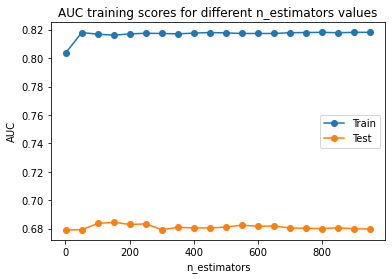

In [6]:
# define lists to collect scores
train_scores, test_scores = list(), list()

# define the estimators to evaluate
values = [i for i in range(1, 1000, 50)]
# evaluate a decision tree for estimator
for i in values:
    # configure the model
    model = RandomForestClassifier(n_estimators=i, max_depth=max_depth, random_state=23).fit(
        x_res, y_res)
    # evaluate on the train dataset
    prediction = model.predict(x_res)
    train_acc = roc_auc_score(y_res, prediction)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_prediction = model.predict(test_features)
    test_acc = roc_auc_score(test_targets, test_prediction)
    test_scores.append(test_acc)
    # summarize progress
    print('n_estimator: %.0f, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs n_estimator
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
plt.title('AUC training scores for different n_estimators values')
plt.ylabel('AUC')
plt.xlabel('n_estimators')
pyplot.legend()
pyplot.show()

#### Check for overfitting by varying max_depth

max_depth: 1, train: 0.801, test: 0.697
max_depth: 4, train: 0.818, test: 0.681
max_depth: 7, train: 0.869, test: 0.619
max_depth: 10, train: 0.903, test: 0.580
max_depth: 13, train: 0.918, test: 0.557


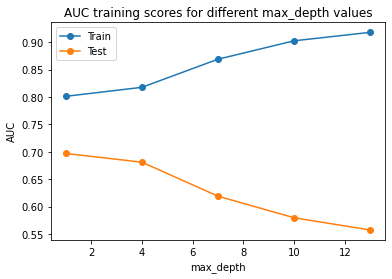

In [7]:
# define lists to collect scores
train_scores, test_scores = list(), list()

# define the estimators to evaluate
values = [i for i in range(1, 16, 3)]
# evaluate a decision tree for estimator
for i in values:
    # configure the model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=i, random_state=23).fit(
        x_res, y_res)
    # evaluate on the train dataset
    prediction = model.predict(x_res)
    train_acc = roc_auc_score(y_res, prediction)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_prediction = model.predict(test_features)
    test_acc = roc_auc_score(test_targets, test_prediction)
    test_scores.append(test_acc)
    # summarize progress
    print('max_depth: %.0f, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs n_estimator
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
plt.title('AUC training scores for different max_depth values')
plt.ylabel('AUC')
plt.xlabel('max_depth')
pyplot.legend()
pyplot.show()

## Run final model on test data to get AUC

Sun Apr 17 01:56:54 2022
mean cross validation score: 0.908
Confusion Matrix:
[[4628 2723]
 [ 237  650]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.95      0.63      0.76      7351
         1.0       0.19      0.73      0.31       887

    accuracy                           0.64      8238
   macro avg       0.57      0.68      0.53      8238
weighted avg       0.87      0.64      0.71      8238



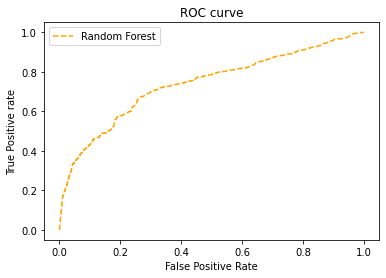

AUC Score: 0.738


'Sun Apr 17 01:57:26 2022'

In [6]:
# for model timing
print(time.ctime())

# create random forest classifier and test on test data
clf=RandomForestClassifier(max_depth=max_depth, n_estimators= n_estimators ,random_state=23)

k = 10
kf = KFold(n_splits=k, shuffle = True)

dt_scores = cross_val_score(clf, x_res, y_res, scoring ='roc_auc', cv = kf)
print("mean cross validation score: {}".format(np.round(np.mean(dt_scores),3)))

clf.fit(x_res, y_res)
predictions = clf.predict(test_features)

print("Confusion Matrix:")
print(confusion_matrix(test_targets, predictions))

print("Classification Report")
print(classification_report(test_targets, predictions))
    
#Beginning the plotting of ROC-curve
pred_prob = clf.predict_proba(test_features)
fpr, tpr, thresh = roc_curve(test_targets, pred_prob[:,1], pos_label=1)
    
#Plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Random Forest')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
    
#AUC Score
auc_score = roc_auc_score(test_targets, pred_prob[:,1])
print("AUC Score: " + str(np.round(auc_score , 3)))

# for model timing
time.ctime()